# Proyecto: Segmentación de videos de Tik Tok
## Notebook 3: Aplicación de un modelo de aprendizaje automático no supervisado

## Objetivo de la notebook:

Encontrar patrones en los datos de videos de Tik Tok que pueden ayudarnos a analizarlos de manera más efectiva utilizando K-Means.

## Importar y cargar las librerías

In [1]:
#Importamos las librerías
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
import warnings
# Ignorar todos los warnings
warnings.filterwarnings('ignore')
# Ignorar un warning específico por categoría
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Importamos el dataset

In [ ]:
#Lectura del dataset sin datos faltantes
tik_tok2= pd.read_csv('../Data/tik_tok3.csv',delimiter=',',encoding='utf8')
tik_tok2

## Análisis del dataset

In [3]:
df.shape

(19084, 15)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,tipo_declaracion,ID_video,duracion_video_seg,transcripcion_video,estado_verificado,estado_bloqueo_autor,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video,largo_de_texto
0,0,0,1,1,7017666017,59,someone shared with me that drone deliveries a...,0,2,343296.0,19425.0,241.0,1.0,0.0,1
1,1,1,2,1,4014381136,32,someone shared with me that there are more mic...,0,1,140877.0,77355.0,19034.0,1161.0,684.0,1
2,2,2,3,1,9859838091,31,someone shared with me that american industria...,0,1,902185.0,97690.0,2858.0,833.0,329.0,1
3,3,3,4,1,1866847991,25,someone shared with me that the metro of st. p...,0,1,437506.0,239954.0,34812.0,1234.0,584.0,1
4,4,4,5,1,7105231098,19,someone shared with me that the number of busi...,0,1,56167.0,34987.0,4110.0,547.0,152.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          19084 non-null  int64  
 1   Unnamed: 0            19084 non-null  int64  
 2   ID                    19084 non-null  int64  
 3   tipo_declaracion      19084 non-null  int64  
 4   ID_video              19084 non-null  int64  
 5   duracion_video_seg    19084 non-null  int64  
 6   transcripcion_video   19084 non-null  object 
 7   estado_verificado     19084 non-null  int64  
 8   estado_bloqueo_autor  19084 non-null  int64  
 9   vistas_video          19084 non-null  float64
 10  likes_video           19084 non-null  float64
 11  compartido_video      19084 non-null  float64
 12  descargas_video       19084 non-null  float64
 13  comentarios_video     19084 non-null  float64
 14  largo_de_texto        19084 non-null  int64  
dtypes: float64(5), int6

In [6]:
#confirmamos que no haya valores nulos
df.isna().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
tipo_declaracion        0
ID_video                0
duracion_video_seg      0
transcripcion_video     0
estado_verificado       0
estado_bloqueo_autor    0
vistas_video            0
likes_video             0
compartido_video        0
descargas_video         0
comentarios_video       0
largo_de_texto          0
dtype: int64

In [7]:
#Eliminamos las columnas que no aportarían valor
df= df.loc[:, ~df.columns.isin(["Unnamed: 0.1", "Unnamed: 0", "ID", "tipo_declaracion", "ID_video","transcripcion_video","estado_verificado","estado_bloqueo_autor","tipo_declaracion","largo_de_texto" ])]


In [8]:
df.head()


,duracion_video_seg,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video
0,59,343296.0,19425.0,241.0,1.0,0.0
1,32,140877.0,77355.0,19034.0,1161.0,684.0
2,31,902185.0,97690.0,2858.0,833.0,329.0
3,25,437506.0,239954.0,34812.0,1234.0,584.0
4,19,56167.0,34987.0,4110.0,547.0,152.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duracion_video_seg  19084 non-null  int64  
 1   vistas_video        19084 non-null  float64
 2   likes_video         19084 non-null  float64
 3   compartido_video    19084 non-null  float64
 4   descargas_video     19084 non-null  float64
 5   comentarios_video   19084 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 894.7 KB


## Segmentación usando K- means

### Evaluar si las variables cumplen los requerimientos
- **Forma de los clusters**: La varianza de la distribución es esférica. Lo que significa que los clusters tienen una forma esférica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones.
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

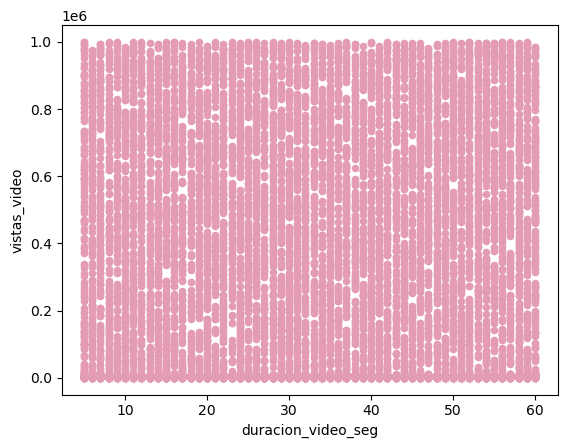

In [10]:
ex1 = df.plot.scatter(x='duracion_video_seg',
                      y='vistas_video',
                      c='#e39cb2')

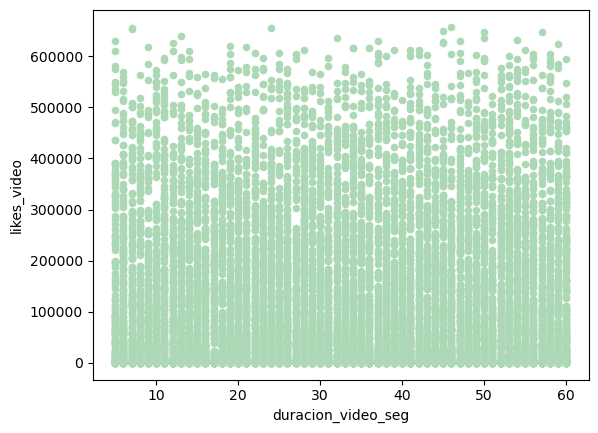

In [11]:
ex2 = df.plot.scatter(x='duracion_video_seg',
                      y='likes_video',
                      c='#add8b6')

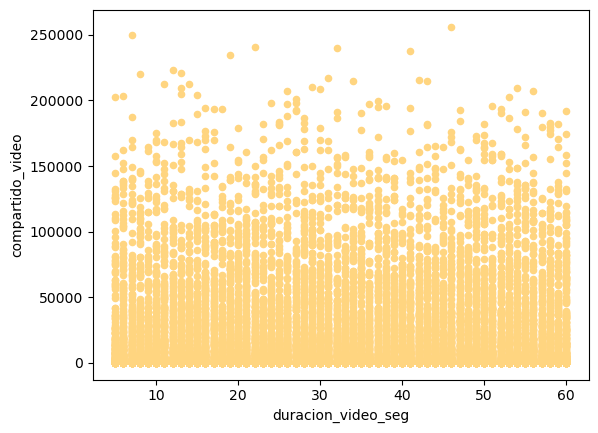

In [12]:
ex3 = df.plot.scatter(x='duracion_video_seg',
                      y='compartido_video',
                      c='#ffd580')

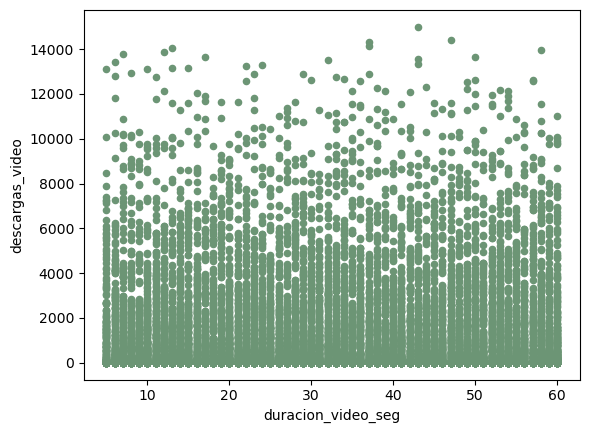

In [13]:
ex4 = df.plot.scatter(x='duracion_video_seg',
                      y='descargas_video',
                      c='#6c9575')

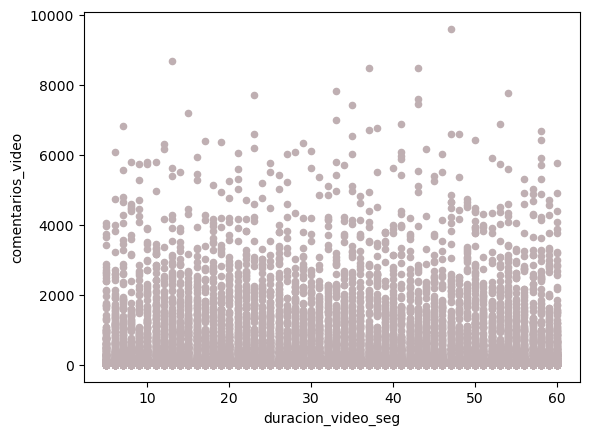

In [14]:
ex5 = df.plot.scatter(x='duracion_video_seg',
                      y='comentarios_video',
                      c='#bfafb2')

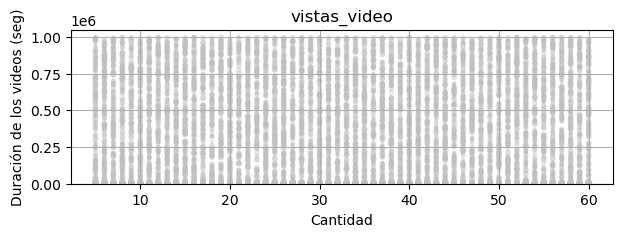

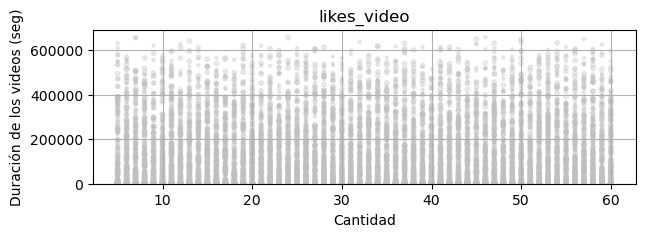

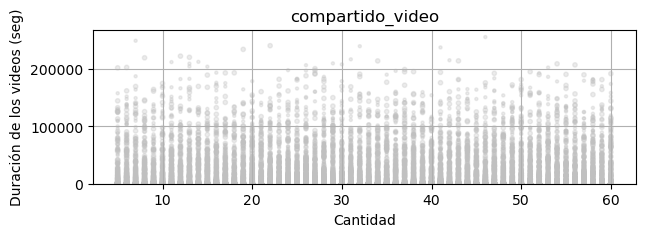

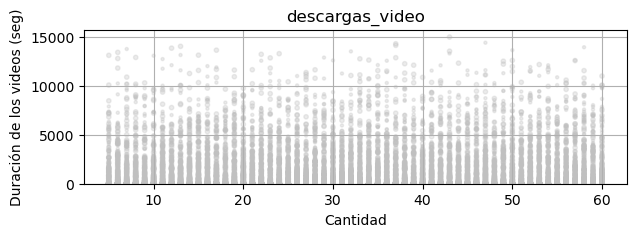

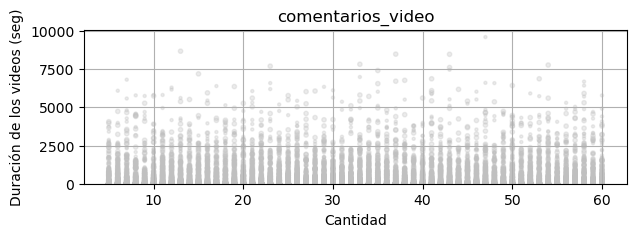

In [15]:
#scatter plot de las variables sin escalar
for i in list(df.columns)[1:]:
    y_variables = i
    x = df['duracion_video_seg']
    y = df[y_variables]
    plt.figure(figsize=(7,2))
    plt.scatter(x, y, marker='o', c='#c0c0c0', sizes=(5,10), alpha=.3)
    plt.grid()
    plt.ylim(ymin=0)
    plt.xlabel("Cantidad")
    plt.ylabel("Duración de los videos (seg)")
    plt.title(y_variables)
    plt.subplots_adjust(hspace = 0.5)
    plt.show()

In [16]:
#Calculamos la matriz de correlación para las variables numéricas
corr = df.corr()

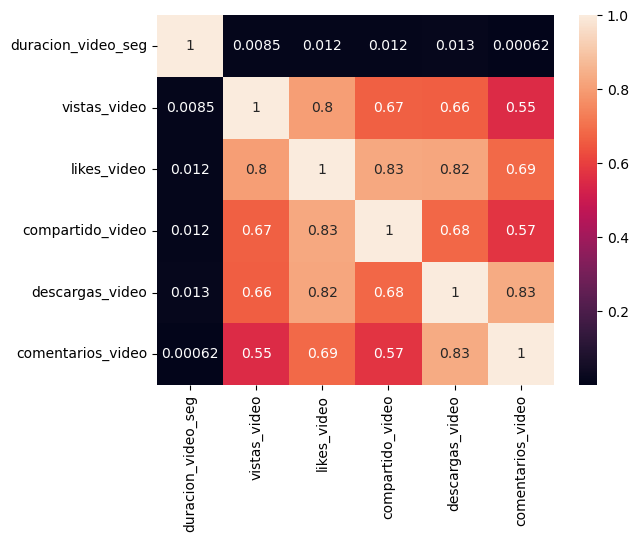

In [17]:
#Representación visual de la matriz de correlación
sns.heatmap(corr, annot=True)
plt.show()

<div class="alert alert-block alert-success">
La variable duracion_video_seg parecería tener poca o ninguna correlación entre las variables. </div>

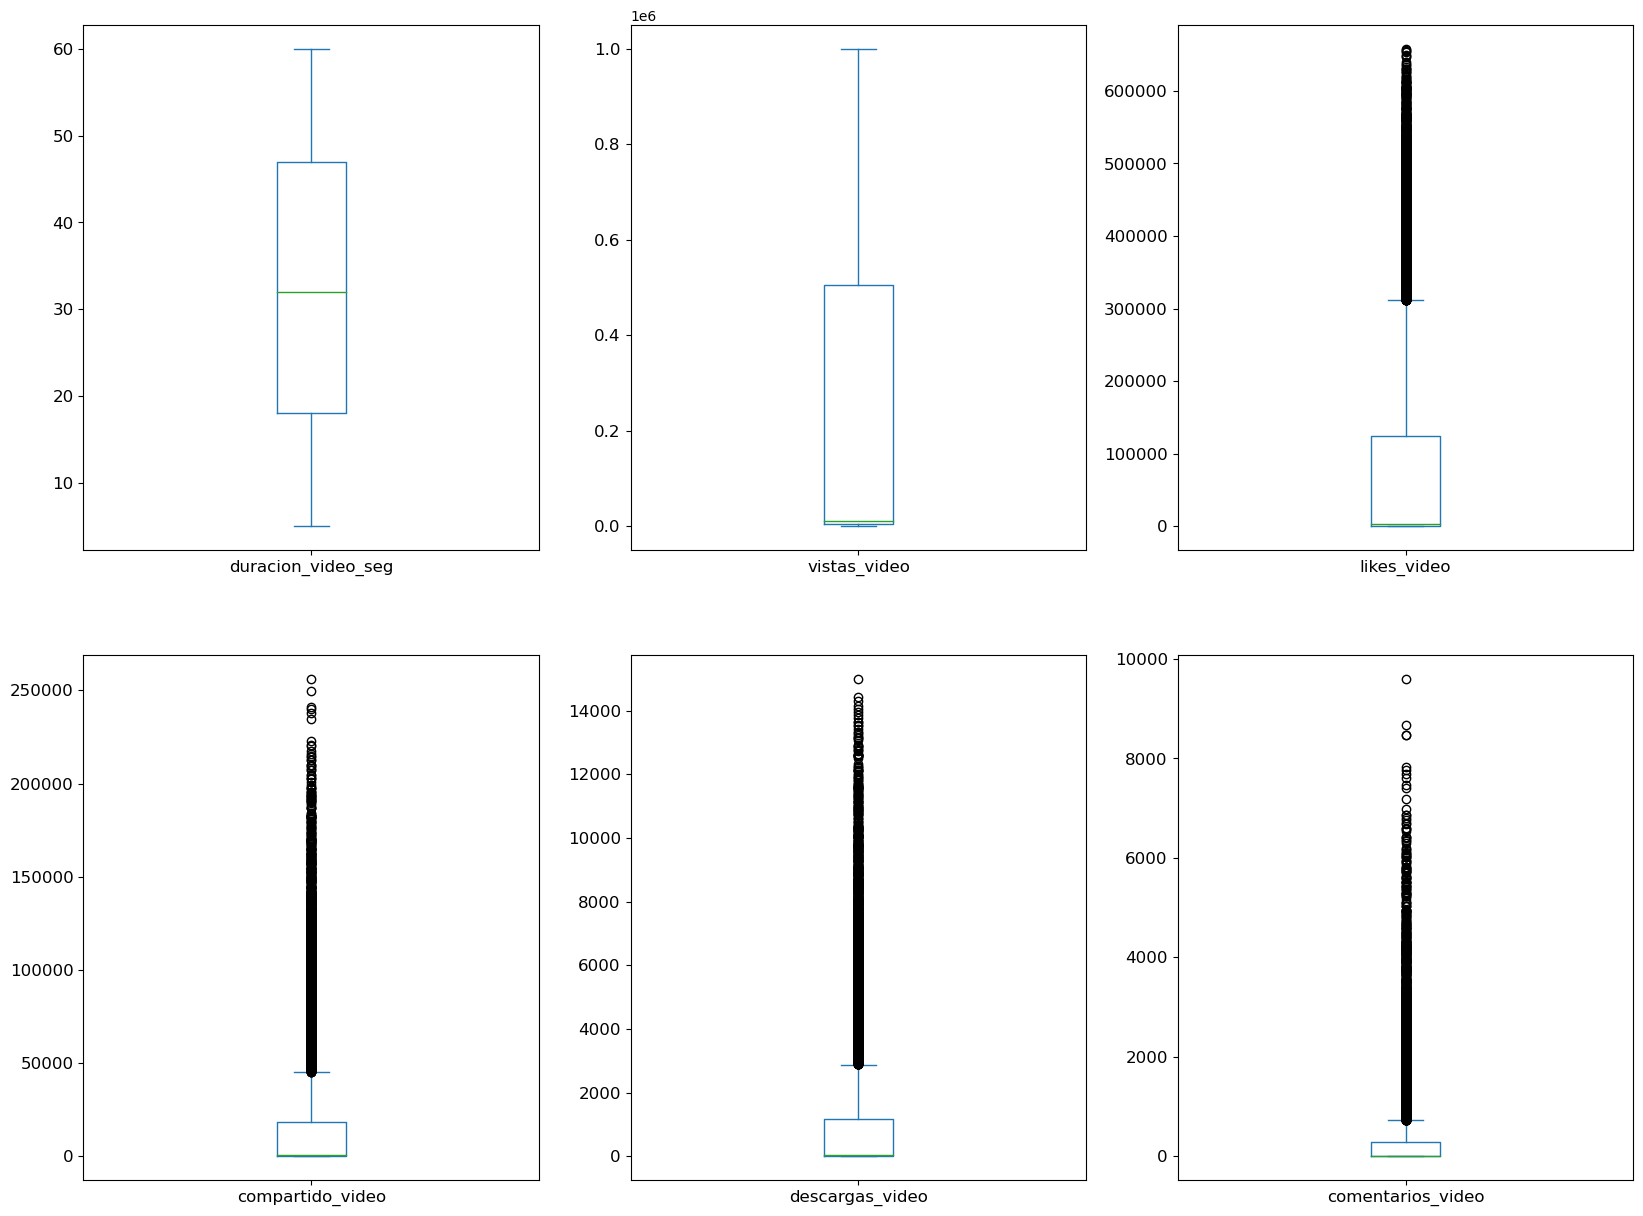

In [18]:
plt=df[['duracion_video_seg','vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video']].plot(kind= 'box' , subplots=True, layout=(2,3), sharex=False, sharey=False,fontsize=12,figsize=(20,15))

### Escalado de datos

Debido a la presencia de numerosos valores atípicos, se utilizará Robust Scaler que utiliza el rango intercuartil, en lugar del min-max utilizado en MinMax Scaler. 

In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
scaler = RobustScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [22]:
df_scaled = pd.DataFrame(data = df_scaled, columns = df.columns)

In [23]:
df_scaled

,duracion_video_seg,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video
0,0.931034,0.667505,0.128988,-0.026288,-0.039156,-0.030928
1,0.000000,0.262168,0.595378,1.011598,0.970198,2.319588
2,-0.034483,1.786660,0.759094,0.118242,0.684794,1.099656
3,-0.241379,0.856157,1.904452,1.882973,1.033718,1.975945
4,-0.448276,0.092539,0.254277,0.187386,0.435936,0.491409
...,...,...,...,...,...,...
19079,0.586207,-0.007785,-0.023996,-0.035125,-0.033065,-0.024055
19080,-0.310345,-0.013980,-0.020800,-0.035732,-0.037416,-0.030928
19081,0.620690,-0.018464,-0.026580,-0.039211,-0.038286,-0.027491
19082,-0.827586,-0.013137,-0.022128,-0.032805,-0.030455,-0.017182


In [26]:
import matplotlib
import matplotlib.pyplot as plt

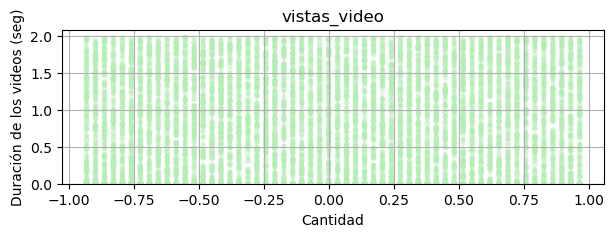

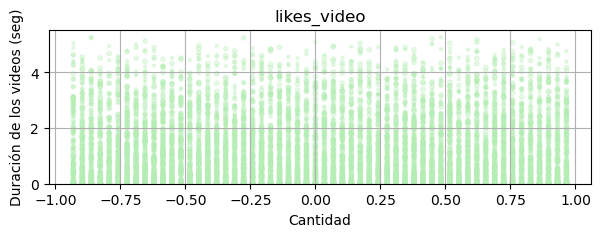

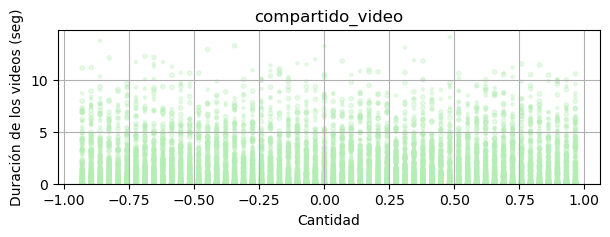

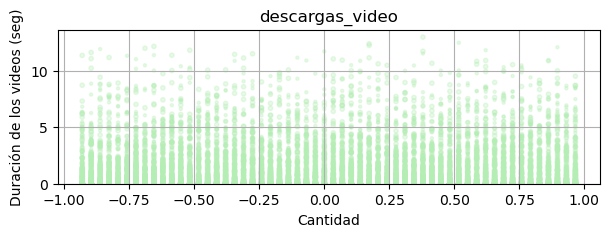

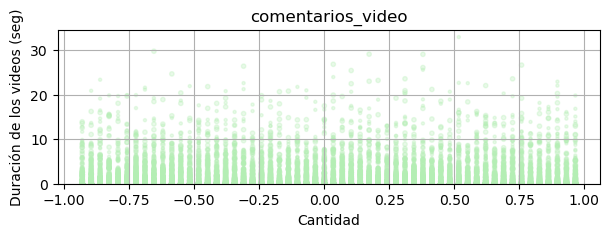

In [27]:
#scatter plot de las variables escaladas mediante RobustScaler
for i in list(df_scaled.columns)[1:]:
    y_variables = i
    x = df_scaled['duracion_video_seg']
    y = df_scaled[y_variables]
    plt.figure(figsize=(7,2))
    plt.scatter(x, y, marker='o', c='#b4eeb4', sizes=(5,10), alpha=.3)
    plt.grid()
    plt.ylim(ymin=0)
    plt.xlabel("Cantidad")
    plt.ylabel("Duración de los videos (seg)")
    plt.title(y_variables)
    plt.subplots_adjust(hspace = 0.5)
    plt.show()


<div class="alert alert-block alert-success"> 
El escalado no afecta la distribución de las variables. 
</div>



### Seleccionamos las variables a utilizar en el modelo

In [28]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duracion_video_seg  19084 non-null  float64
 1   vistas_video        19084 non-null  float64
 2   likes_video         19084 non-null  float64
 3   compartido_video    19084 non-null  float64
 4   descargas_video     19084 non-null  float64
 5   comentarios_video   19084 non-null  float64
dtypes: float64(6)
memory usage: 894.7 KB


In [29]:
from sklearn.cluster import KMeans

### 1. Segmentación usando duración del video y cantidad de likes 

In [30]:
X= df_scaled.iloc[:, [0,2]].values

In [31]:
X

array([[ 0.93103448,  0.12898798],
       [ 0.        ,  0.59537836],
       [-0.03448276,  0.75909403],
       ...,
       [ 0.62068966, -0.02658015],
       [-0.82758621, -0.02212798],
       [ 0.89655172, -0.02083983]])

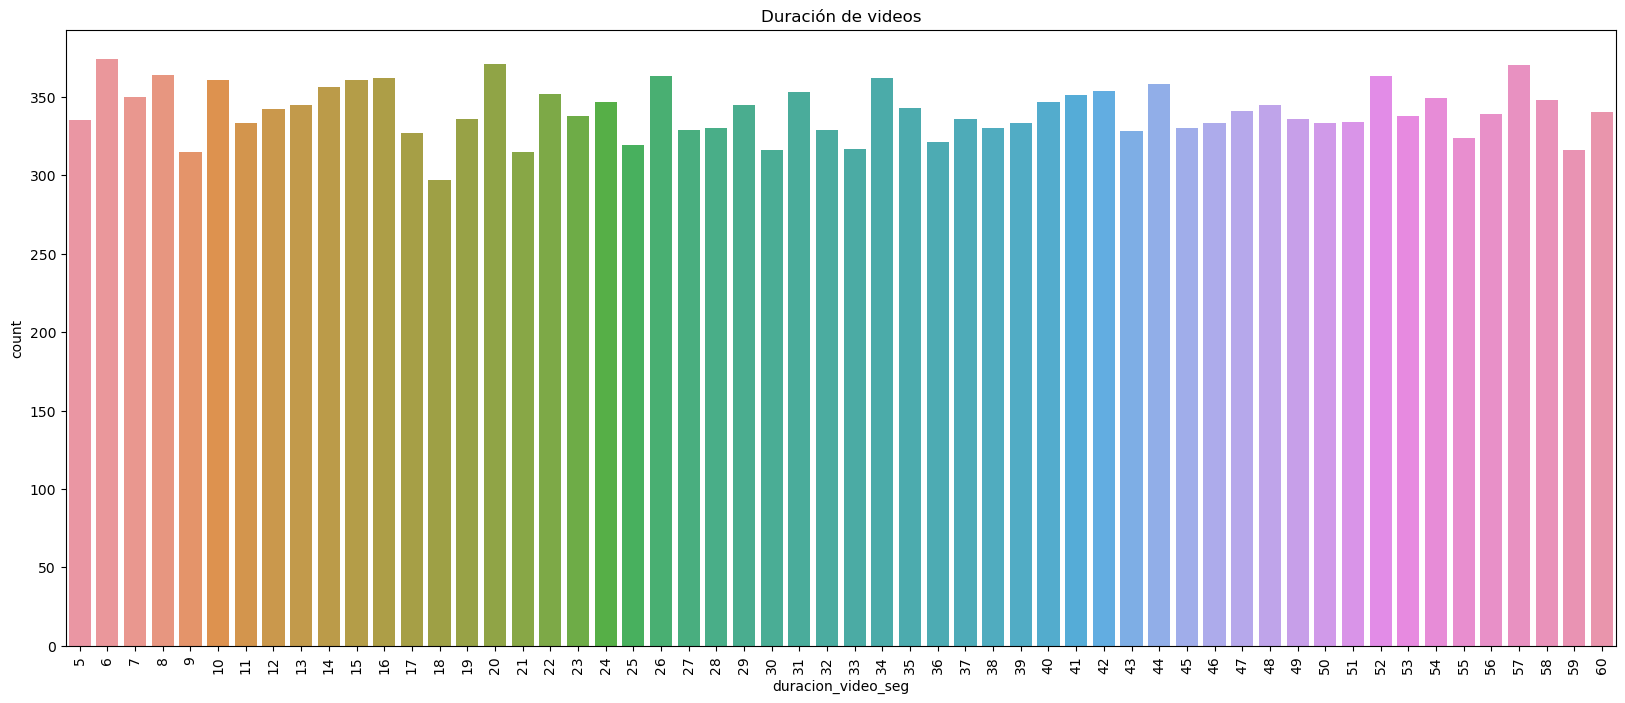

In [32]:
plt.figure(figsize = (20, 8))
sns.countplot(x="duracion_video_seg", data=df)
plt.title("Duración de videos")
plt.xticks(rotation=90)
plt.show()

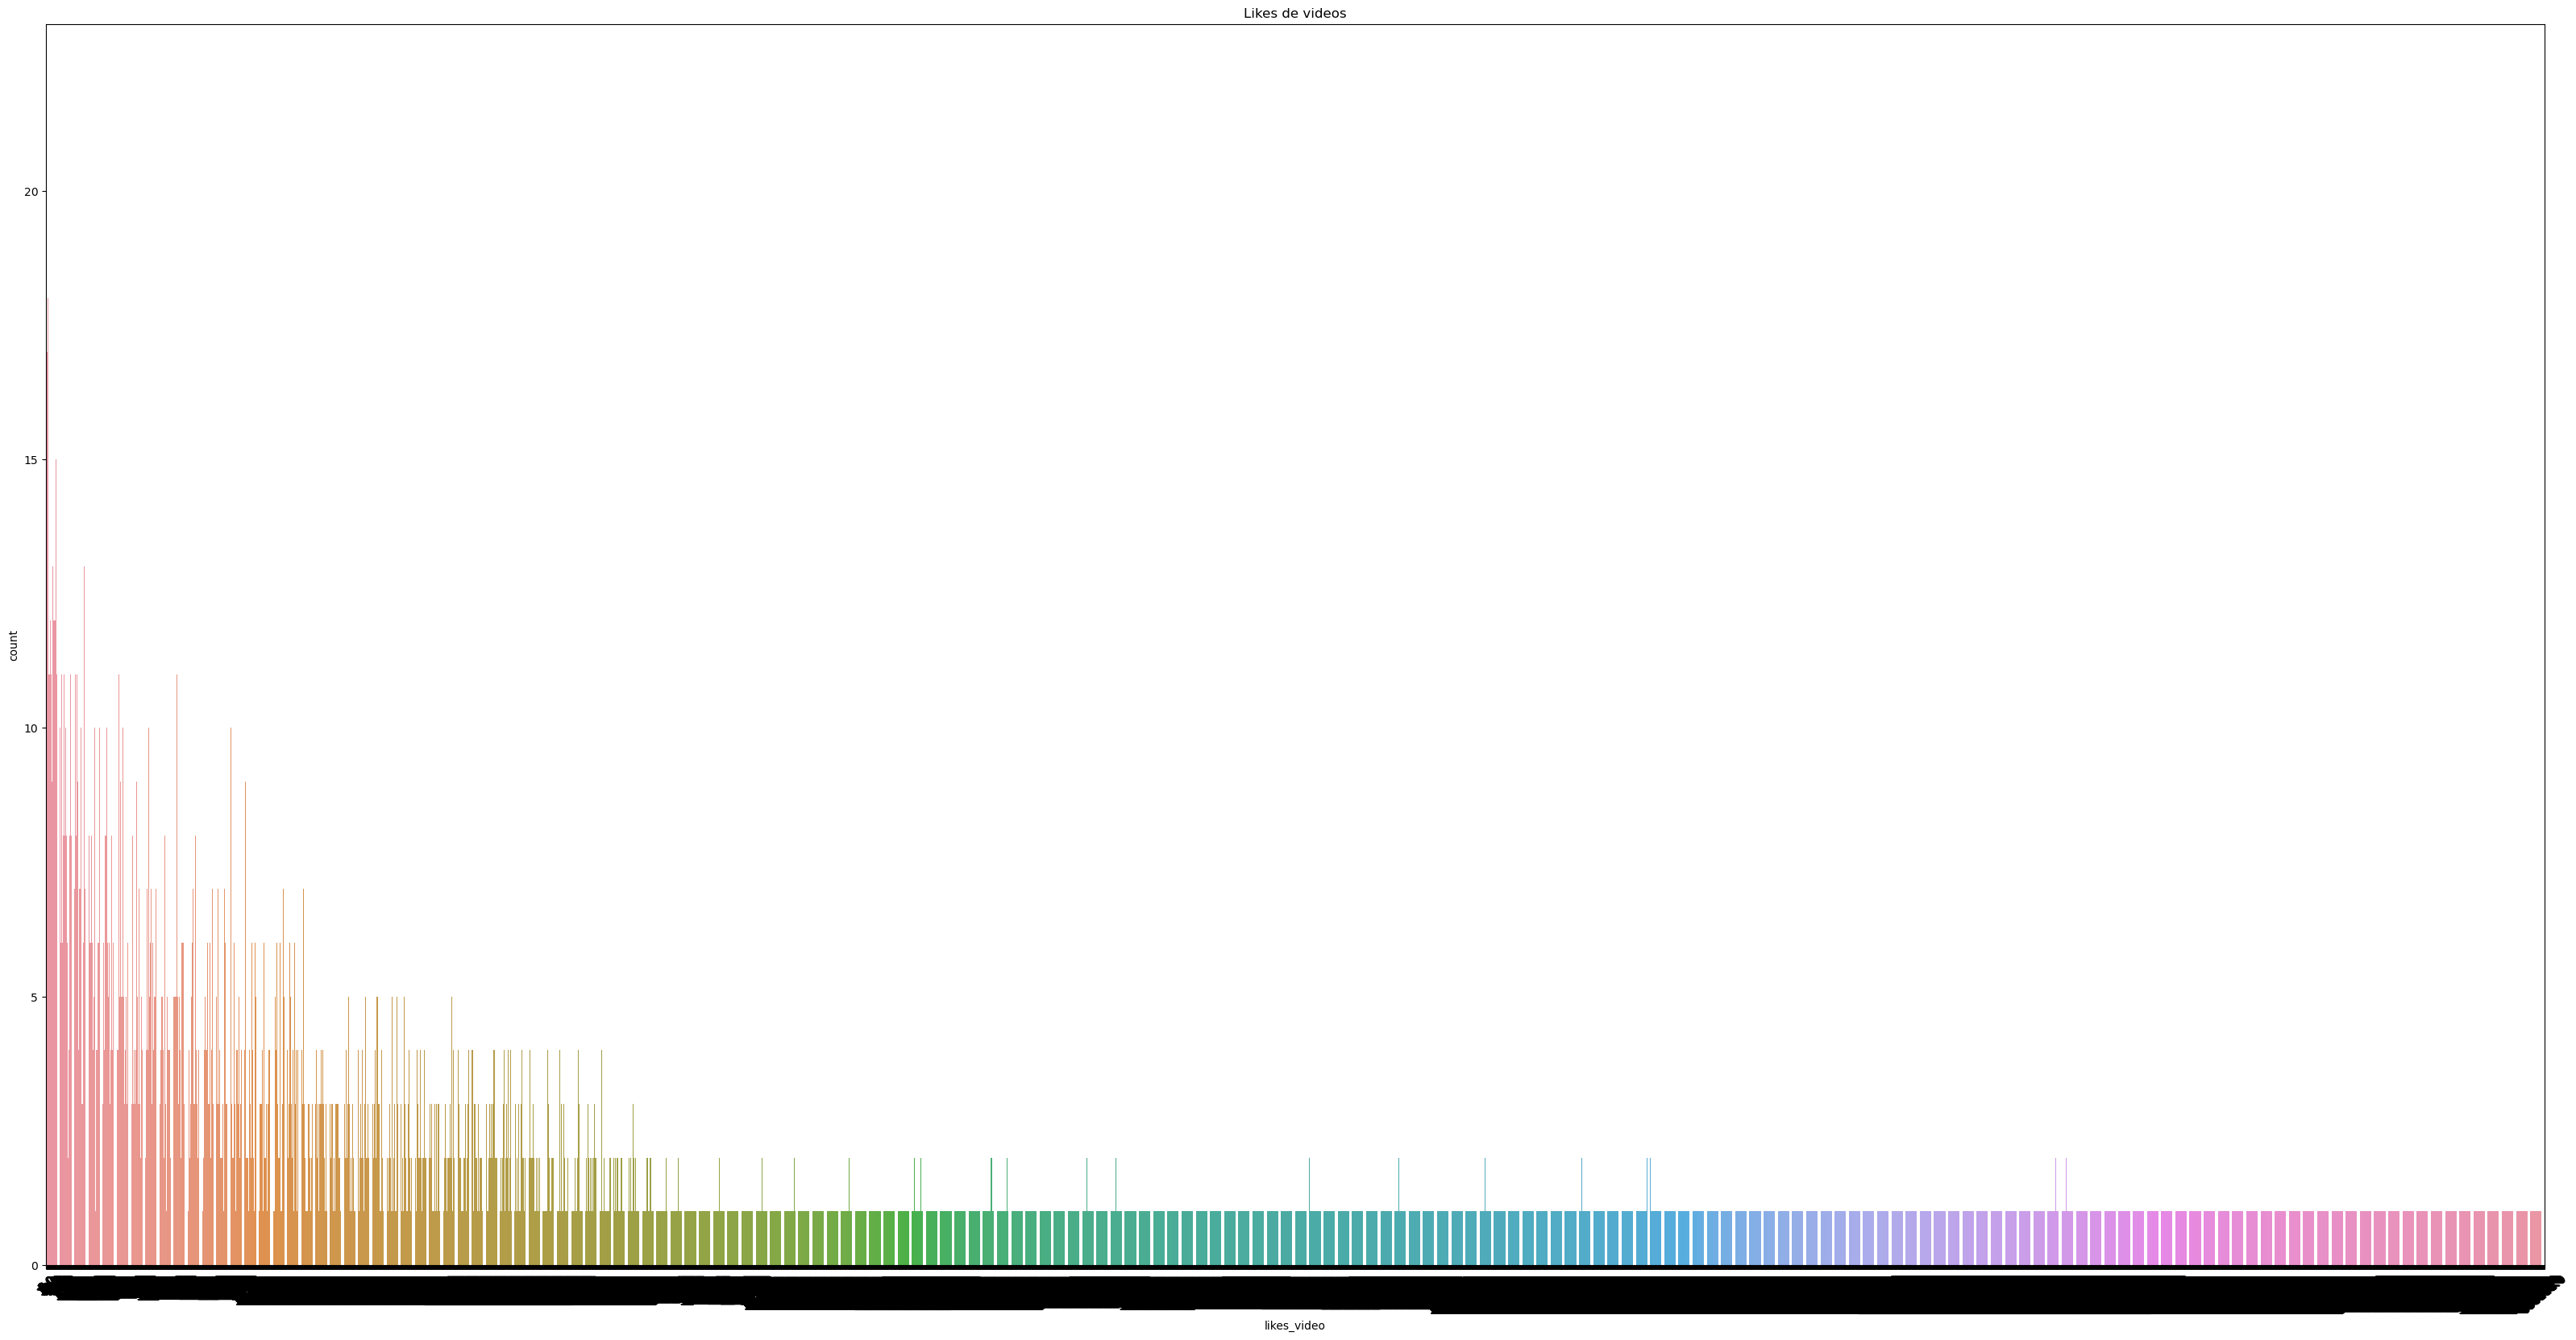

In [33]:
plt.figure(figsize = (40, 20))
sns.countplot(x='likes_video', data=df)
plt.title("Likes de videos")
plt.xticks(rotation=40)
plt.show()

### Método del codo
Se aplica previamente al ajuste del modelo para tener una aproximación a la cantidad de clusters que deberán ser asignados. 
Este método consiste en graficar la variación total explicada (inercia) por el modelo en función del número de clusters, y luego seleccionar el número de clusters donde la disminución en la variación comienza a disminuir bruscamente.

In [34]:
K = np.arange(1, 11) 
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0, max_iter=300, n_init=10)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

In [35]:
lista_inercias

[27992.782871183328,
 10966.63849758962,
 7315.110752337256,
 4732.108556258161,
 3939.969153901747,
 3287.682253991672,
 2707.933853782739,
 2285.018619229861,
 2002.4569416900438,
 1794.867920181908]

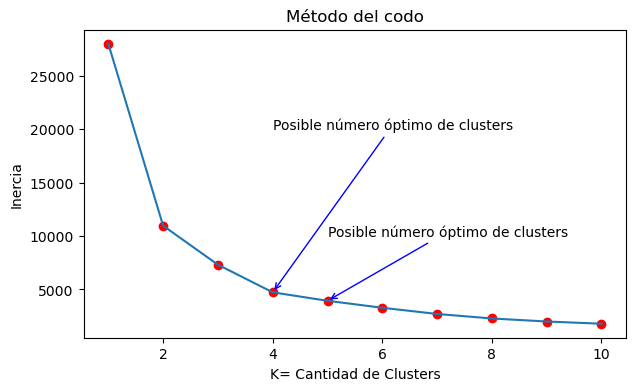

In [39]:
fig, ax = plt.subplots(figsize = (7,4))
ax.plot(K,lista_inercias)
ax.scatter(K,lista_inercias,c='r')


ax.set_title('Método del codo')
ax.set_xlabel('K= Cantidad de Clusters')
ax.set_ylabel('Inercia')

# Annotate arrow
ax.annotate('Posible número óptimo de clusters', xy=(4,  4732), xytext=(4, 20000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=1))

ax.annotate('Posible número óptimo de clusters', xy=(5, 3939), xytext=(5, 10000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=1))
plt.show()

Como podemos ver en el gráfico anterior, el cambio significativo en la inercia de da en k=4 o k=5.  

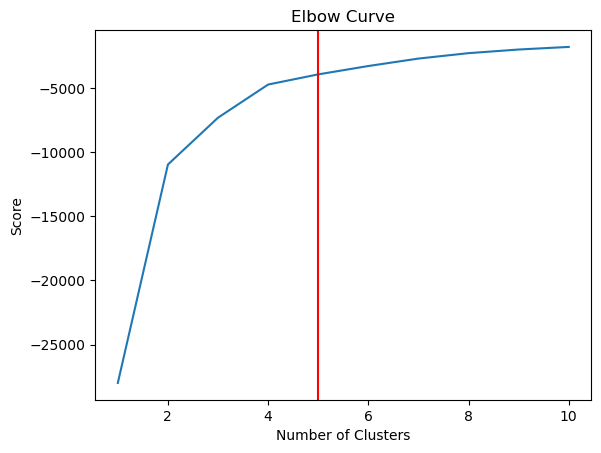

In [83]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.axvline(5,0,1,color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## OPCIÓN 1 K=4

In [43]:
#Especificamos el número de clusters
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

#Entrenamos el modelo con los datos sin pasarles las etiquetas
algorithm.fit(X)
labels1 = algorithm.labels_

#consultamos el lugar de los centroides 
centroids1 = algorithm.cluster_centers_

In [44]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

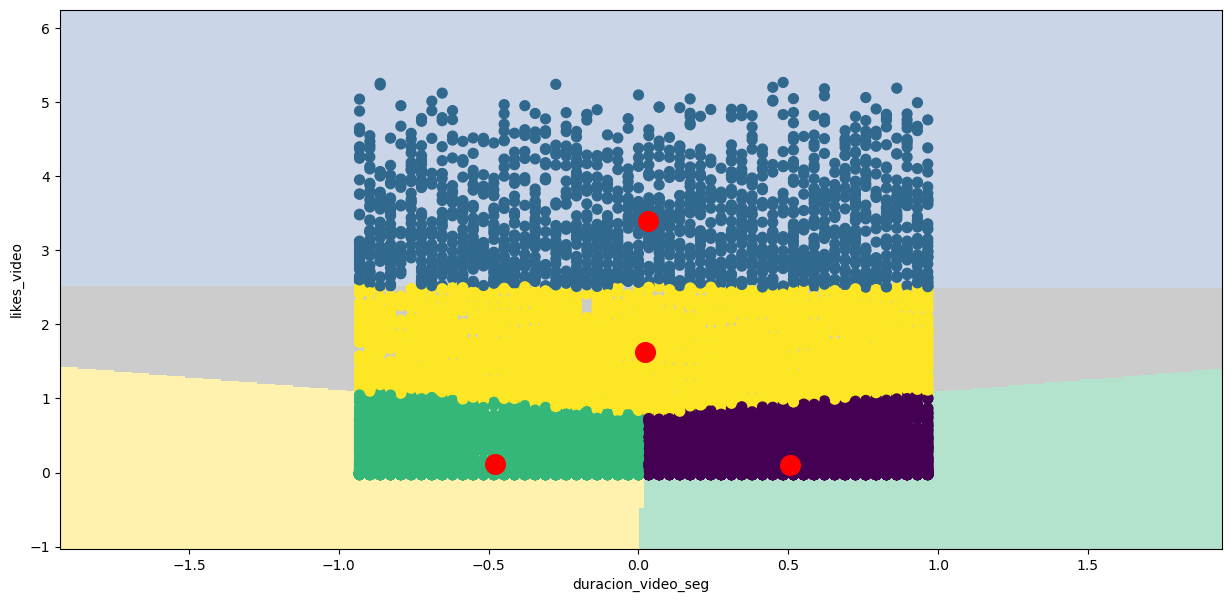

In [45]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'duracion_video_seg' ,y = 'likes_video' , data = df_scaled , c = labels1 , 
            s = 50 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 1)
plt.ylabel('likes_video') , plt.xlabel('duracion_video_seg')
plt.show()

## OPCIÓN 2 K=5

In [46]:
#Especificamos el número de clusters
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

#Entrenamos el modelo con los datos sin pasarles las etiquetas
algorithm.fit(X)
labels1 = algorithm.labels_

#consultamos el lugar de los centroides 
centroids1 = algorithm.cluster_centers_

In [47]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

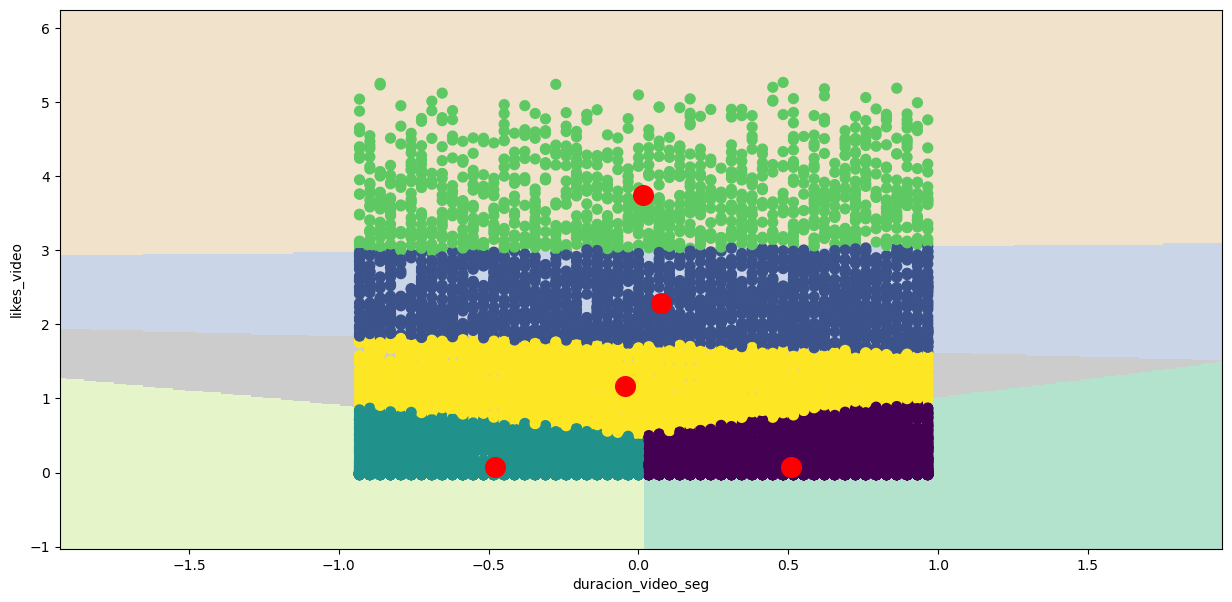

In [48]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'duracion_video_seg' ,y = 'likes_video' , data = df_scaled , c = labels1 , 
            s = 50 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 1)
plt.ylabel('likes_video') , plt.xlabel('duracion_video_seg')
plt.show()

## OPCIÓN 3 K=4

In [84]:
#Especificamos el número de clusters
kmeansmodel = KMeans(n_clusters= 4, random_state=0)

#Entrenamos el modelo con los datos sin pasarles las etiquetas
y_kmeans= kmeansmodel.fit_predict(X)

In [64]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2, 3])

In [65]:
#consultamos el lugar de los centroides 
centros = kmeansmodel.cluster_centers_
print(centros)

[[ 0.50560841  0.1020001 ]
 [ 0.03089961  3.37432774]
 [-0.47809029  0.11073719]
 [ 0.02274784  1.60688295]]


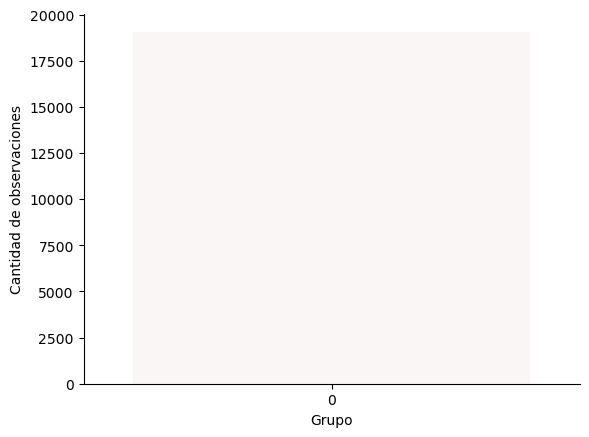

In [85]:
#Consultamos la cantidad de puntos asignados a cada cluster
y_kmeans= kmeansmodel.fit_predict(X)
sns.countplot(y_kmeans, palette='vlag')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de observaciones')
sns.despine()

Ya se sigue viendo que los datos no parecerían ser separables

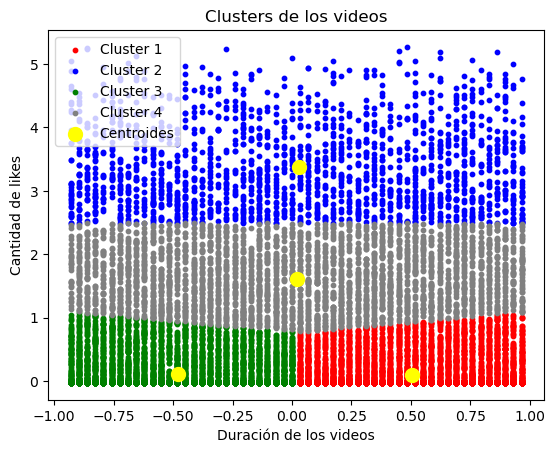

In [55]:
#Visualizamos los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'grey', label = 'Cluster 4')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroides')
plt.title('Clusters de los videos')
plt.xlabel('Duración de los videos')
plt.ylabel('Cantidad de likes')
plt.legend()
plt.show()

## OPCIÓN 4 K=5

In [86]:
#Especificamos el número de clusters
kmeansmodel = KMeans(n_clusters= 5, random_state=0)

#Entrenamos el modelo con los datos sin pasarles las etiquetas
y_kmeans= kmeansmodel.fit_predict(X)

In [57]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2, 3, 4])

In [58]:
#consultamos el lugar de los centroides 
centros = kmeansmodel.cluster_centers_
print(centros)

[[ 0.0110306   3.75654566]
 [ 0.50947304  0.07981234]
 [-0.06408663  1.19274433]
 [-0.47980384  0.0685937 ]
 [ 0.09744483  2.31534102]]


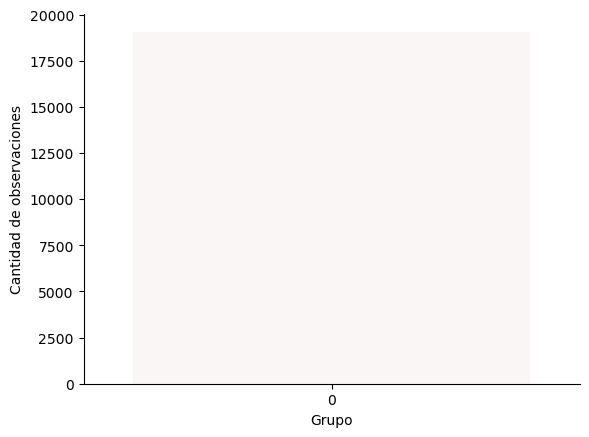

In [87]:
#Consultamos la cantidad de puntos asignados a cada cluster
y_kmeans= kmeansmodel.fit_predict(X)
sns.countplot(y_kmeans, palette='vlag')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de observaciones')
sns.despine()

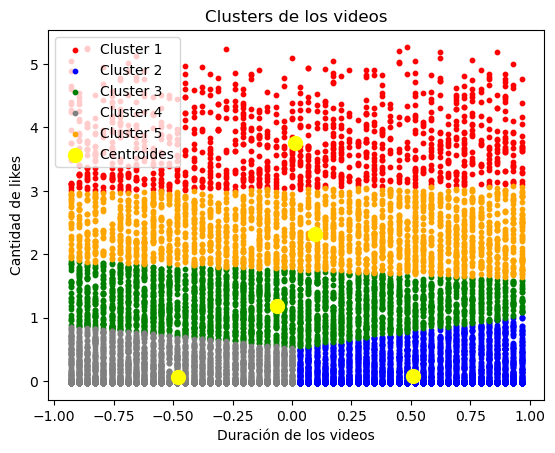

In [61]:
#Visualizamos los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'grey', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroides')
plt.title('Clusters de los videos')
plt.xlabel('Duración de los videos')
plt.ylabel('Cantidad de likes')
plt.legend()
plt.show()

## Evaluación del modelo

### Evaluación con Suma de los Cuadrados de las Distancias (SSD)

In [71]:
# Calcula la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  4732.108556258161


### Evaluación con Silhoutte

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.488954701299542


In [88]:
K = np.arange(2,20)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(X)
  lista_silueta.append(silhouette_score(X, kmeans_silueta.labels_))

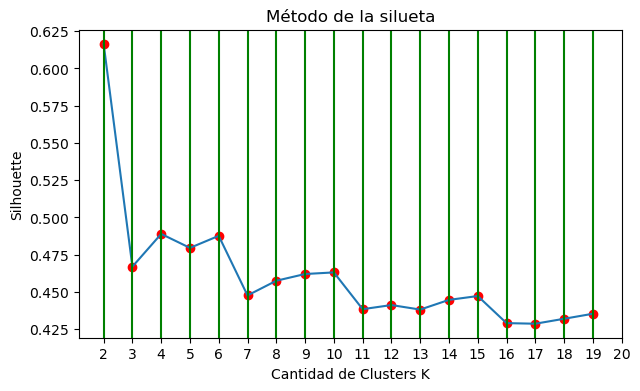

In [89]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette')
plt.title('Método de la silueta')
plt.xticks(np.arange(2,21))
for x in np.arange(2,20):
  plt.axvline(x,0,1,color='green')
plt.show()

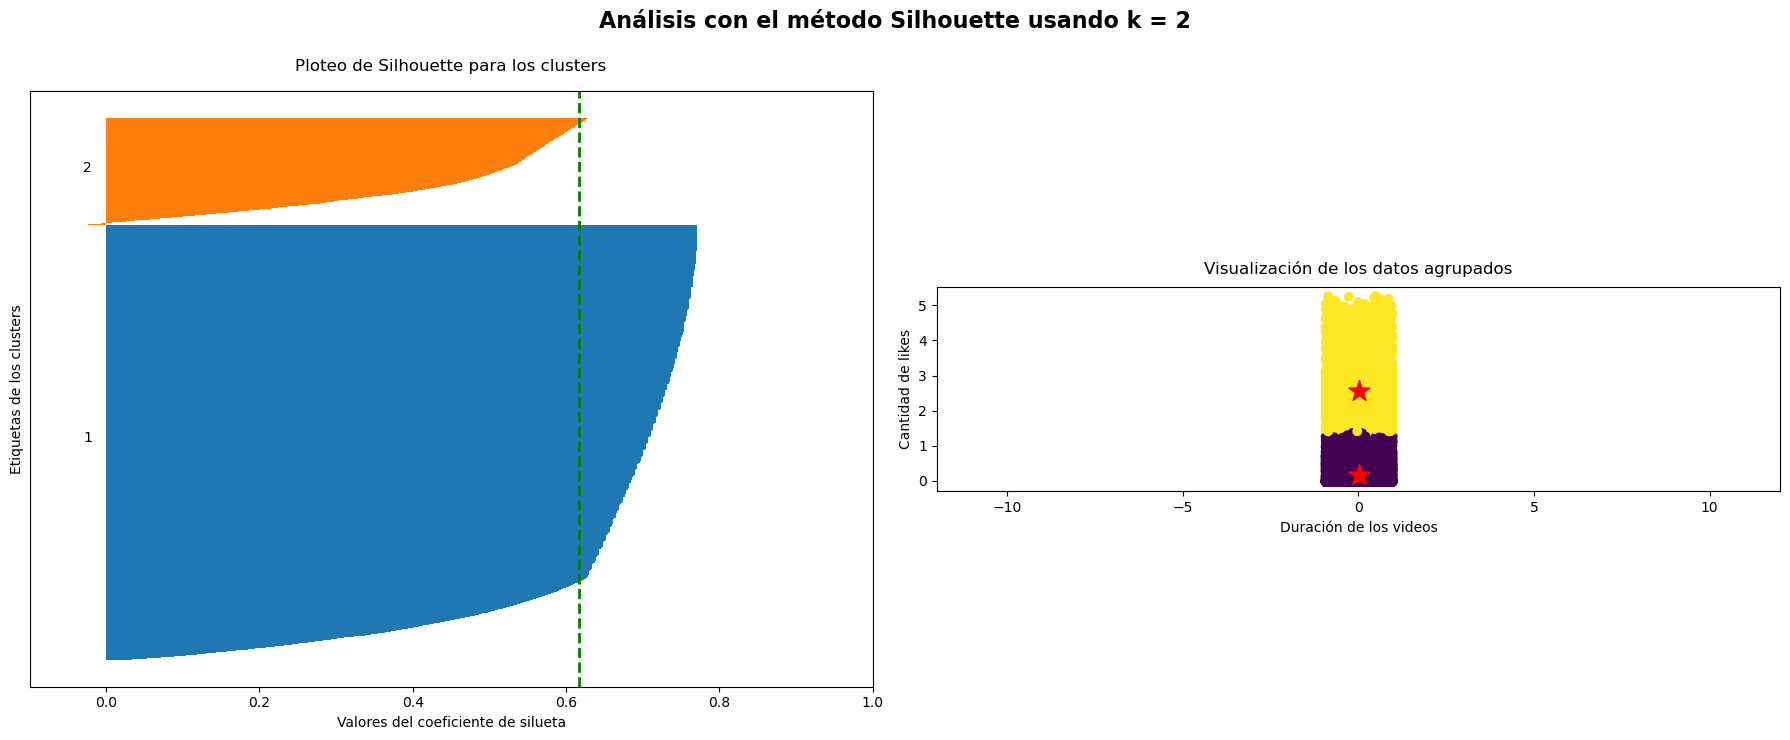

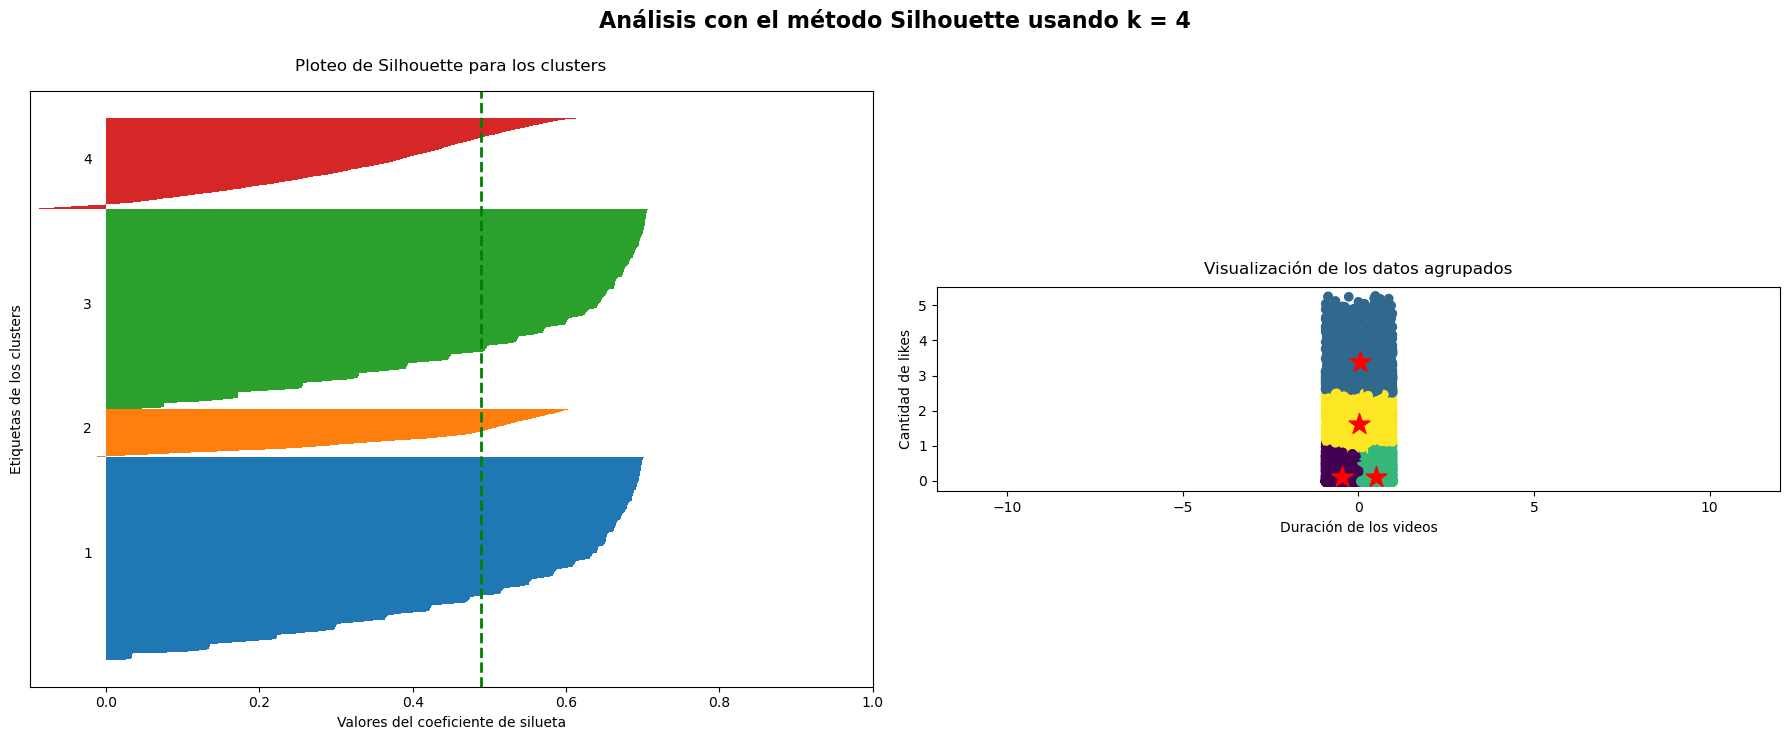

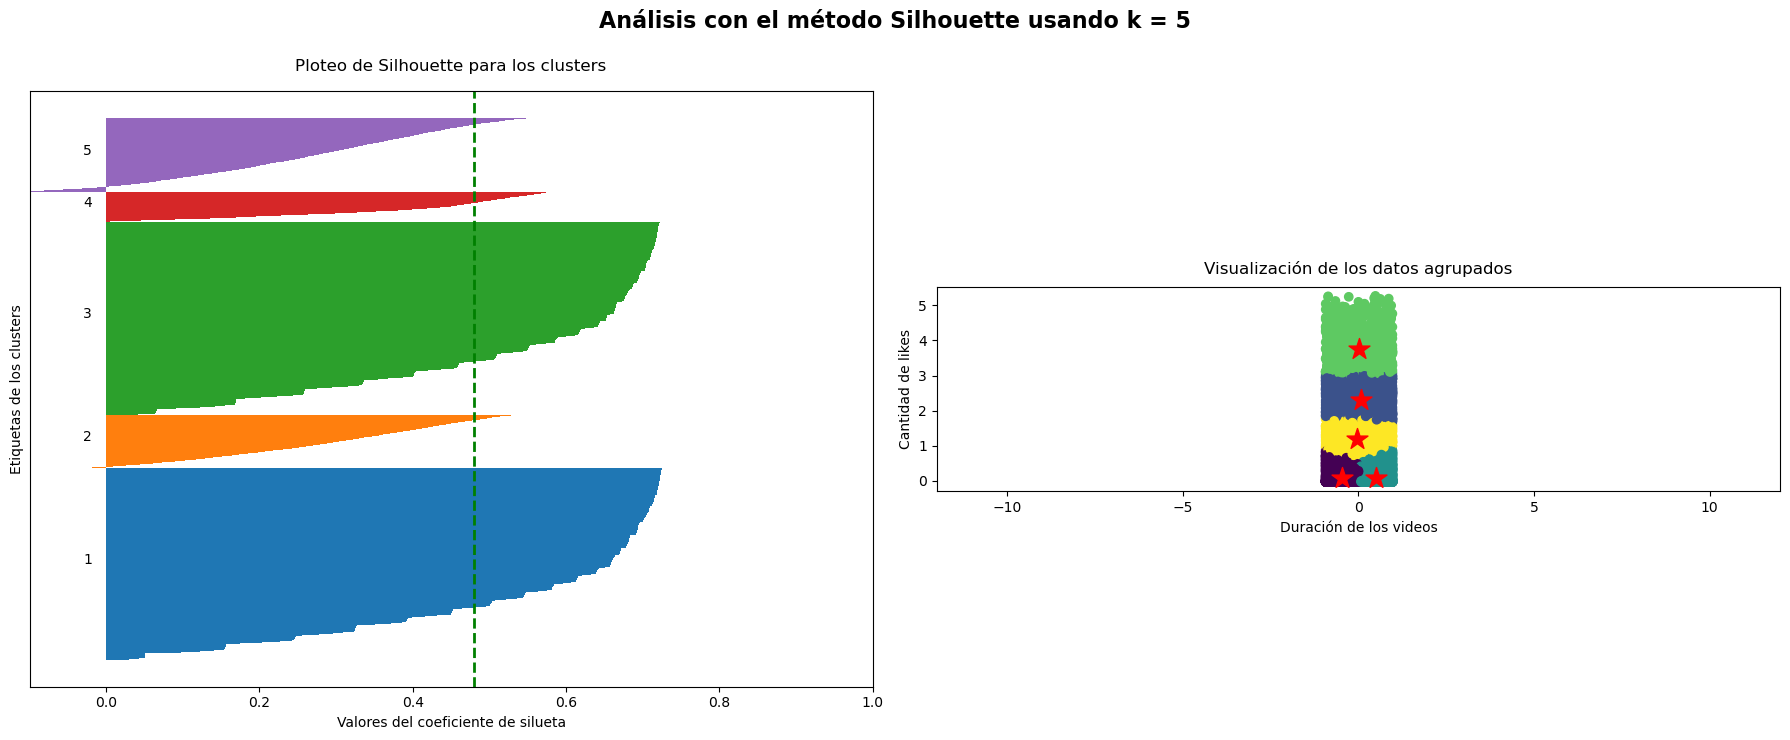

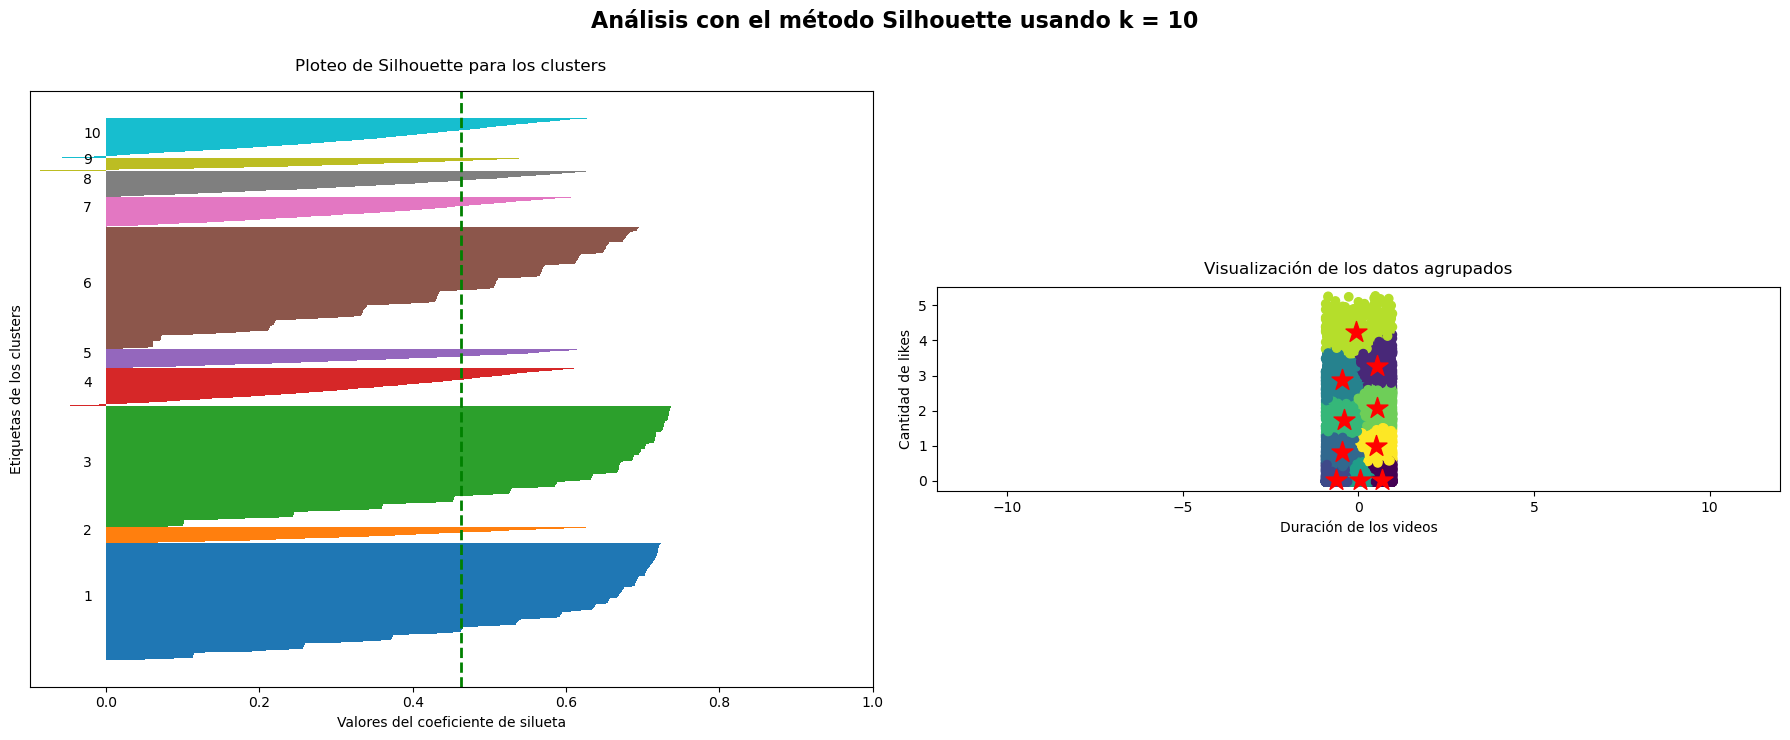

In [90]:
from sklearn.metrics import silhouette_samples

X_std = X
lista_k = [2, 4, 5, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Valores del coeficiente de silueta')
    ax1.set_ylabel('Etiquetas de los clusters')
    ax1.set_title('Ploteo de Silhouette para los clusters', y=1.02);

    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Duración de los videos')
    ax2.set_ylabel('Cantidad de likes')
    ax2.set_title('Visualización de los datos agrupados', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Análisis con el método Silhouette usando k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## Conclusiones

El modelo de KMeans logró realizar el agrupamiento sobre las variables analizadas. Se analizan los supuestos a tener en cuenta para obtener una buena performance del modelo:

- **Forma de los clusters**:
Al graficar la distribución de la duración de los videos con el resto de las variables, esta no presentaba forma esférica. 
De igual manera, se procedió a ajustar el modelo para poder visualizar el agrupamiento final encontrado. 

- **Relación entre las variables**:
En el análisis preliminar del dataset se verificó mediante una matriz de correlación, que las variables en estudio estuvieran poco o nada correlacionadas. 

- **Tamaño de los clusters**: La cantidad de observaciones asignadas a cada cluster no pudo ser verificada, ya que agrupaba a todas en un mismo grupo.

- **Número de dimensiones**: Debido a que KMeans funciona muy mal para conjuntos de datos con un gran número de dimensiones, se eligió trabajar unicamente con dos variables. 

### Limitaciones posibles
La cantidad de clusters óptimos que surjen a partir del método del codo (k=4 y k=5) difirió con lo surgido del método de la silueta (k=2). Lo cual permitiría inferir que alguna característica de los datos hace que se provoque esa discrepancia.  
Probablemente la presencia de numerosos valores atípicos fue uno de los factores que más influyó en el resultado, dado que estos pueden cambiar sustancialmente la media y afectar negativamente el proceso de agrupación.

